In [16]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import cm
import json
import sys
import os
import glob
# make paths above 'notebooks/' visible for local imports.
# +----------------------------------------------------------------------------+
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.features import SelectPFeatures, NumpyEncoder
from src.features import FeaturePlots as fp

In [2]:
sf = SelectPFeatures()

In [3]:
data_dir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/feature_splits'
train = pd.read_csv(f'{data_dir}/p.train.csv')
test = pd.read_csv(f'{data_dir}/p.test.csv')

In [4]:
sr_nonlin_feature_subset = np.array(['amp_ratio_4', 'amp_ratio_5', 'amp_ratio_6', 'amp_ratio_7',
                'amp_1', 'amp_2', 'amp_3', 'amp_4','amp_5', 'signal_variance',
                'signal_dominant_amplitude', 'signal_max_amplitude','signal_dominant_frequency',
                'noise_max_amplitude', 'noise_variance', 
                'source_depth_km', 'source_receiver_distance_logkm',
                'source_receiver_back_azimuth_deg'])

In [5]:
station_feature_dict, feature_names = sf.process_station_datasets(train, test, scaler=False, linear_model=False)
sr_station_feat_dict, sr_feature_names = sf.filter_station_dict_features(station_feature_dict,
                                                                        feature_names,
                                                                        sr_nonlin_feature_subset)

YHB
X shape: (2920, 47), y shape: (2920,)
X shape: (734, 47), y shape: (734,)
YDC
X shape: (2509, 47), y shape: (2509,)
X shape: (645, 47), y shape: (645,)
YWB
X shape: (3069, 47), y shape: (3069,)
X shape: (786, 47), y shape: (786,)
MCID
X shape: (2942, 47), y shape: (2942,)
X shape: (771, 47), y shape: (771,)
YHL
X shape: (2739, 47), y shape: (2739,)
X shape: (682, 47), y shape: (682,)
YMR
X shape: (3393, 47), y shape: (3393,)
X shape: (845, 47), y shape: (845,)
YHH
X shape: (4005, 47), y shape: (4005,)
X shape: (1002, 47), y shape: (1002,)
B207
X shape: (1609, 47), y shape: (1609,)
X shape: (380, 47), y shape: (380,)
YPP
X shape: (1334, 47), y shape: (1334,)
X shape: (338, 47), y shape: (338,)
YPM
X shape: (3358, 47), y shape: (3358,)
X shape: (843, 47), y shape: (843,)
YLT
X shape: (1275, 47), y shape: (1275,)
X shape: (291, 47), y shape: (291,)
QLMT
X shape: (792, 47), y shape: (792,)
X shape: (190, 47), y shape: (190,)
H17A
X shape: (527, 47), y shape: (527,)
X shape: (142, 47), 

In [6]:
sr_feature_names

array(['amp_ratio_4', 'amp_ratio_5', 'amp_ratio_6', 'amp_ratio_7',
       'amp_1', 'amp_2', 'amp_3', 'amp_4', 'amp_5',
       'signal_dominant_frequency', 'signal_dominant_amplitude',
       'noise_max_amplitude', 'signal_max_amplitude', 'signal_variance',
       'noise_variance', 'source_depth_km',
       'source_receiver_distance_logkm',
       'source_receiver_back_azimuth_deg'], dtype='<U32')

In [7]:
sr_feature_plot_names = ['ratio 4', 'ratio 5', 'ratio 6', 'ratio 7', 
                         'amp. 1', 'amp. 2', 'amp. 3', 'amp. 4', 'amp. 5', 
                         'sig. dom. freq.', 'sig. dom. amp.', 'noise max. amp.',
                         'sig. max. amp.', 'sig. var.', 'noise var.', 'depth', 
                         'distance', 'back az.']

In [8]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_feature_selection/rfecv/*'

In [9]:
results_dict = {}
for file in glob.glob(datadir):
    key = os.path.split(file)[-1].split('.')[0]
    with open(file) as fp:
        results = json.load(fp)
    results_dict[key] = results

In [10]:
# From this example https://matplotlib.org/stable/gallery/statistics/customized_violin.html#sphx-glr-gallery-statistics-customized-violin-py
def plot_values(vals):
    q1, median, q3 = np.percentile(vals, [25, 50, 75])
    ir = (q3 - q1)
    vals = np.sort(vals)
    # Upper inner fence
    upper_inner_fence = q3 +  ir * 1.5
    upper_adjacent_value = np.clip(upper_inner_fence, q3, vals[-1])
    # Lower inner fence
    lower_inner_fence = q1 - ir * 1.5
    lower_adjacent_value = np.clip(lower_inner_fence, vals[0], q1)

    return median, q1, q3, lower_adjacent_value, upper_adjacent_value

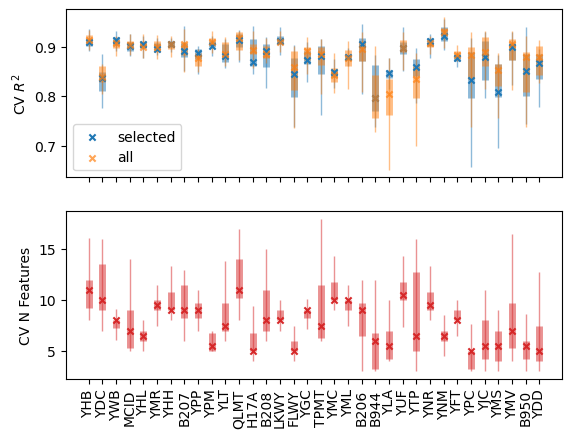

In [11]:
fig, ax = plt.subplots(2, 1)
ax, ax2 = ax
# ax2 = ax.twinx()

xlabels = []
for i, key in enumerate(results_dict.keys()):
    xlabels.append(key)
    ts_optfts = results_dict[key]['test_score_optfts']
    ts_allfts = results_dict[key]['test_score_allfts']

    median1, q1, q3, if1, if2 = plot_values(ts_optfts)
    # ax.scatter(i, median, color='C0', marker='x', s=20)
    ax.vlines(x=i, ymin=q1, ymax=q3, alpha=0.5, lw=5, color='C0')
    ax.vlines(x=i, ymin=if1, ymax=if2, alpha=0.5, lw=1, color='C0')

    median2, q1, q3, if1, if2 = plot_values(ts_allfts)
    ax.vlines(x=i, ymin=q1, ymax=q3, alpha=0.5, lw=5, color='C1')
    ax.vlines(x=i, ymin=if1, ymax=if2, alpha=0.5, lw=1, color='C1')

    label1, label2, = None, None
    if i == 1:
        label1 = 'selected'
        label2 = 'all'
    ax.scatter(i, median1, color='C0', marker='x', s=20, zorder=5, label=label1)
    ax.scatter(i, median2, color='C1', marker='x', s=20, zorder=5, alpha=0.7, label=label2)

    n_feats = results_dict[key]['n_feats']
    median, q1, q3, if1, if2 = plot_values(n_feats)
    ax2.scatter(i, median, color='C3', marker='x', s=20)
    ax2.vlines(x=i, ymin=q1, ymax=q3, alpha=0.5, lw=5, color='C3')
    ax2.vlines(x=i, ymin=if1, ymax=if2, alpha=0.5, lw=1, color='C3')
    
ax.set_xticks(np.arange(len(xlabels)), labels=[])
ax2.set_xticks(np.arange(len(xlabels)), labels=xlabels, rotation=90);
ax.set_ylabel(r'CV $R^2$')
ax2.set_ylabel(r'CV N Features')
ax.legend()
#ax2.set_ylim([0, 18])

In [46]:
important_feats_df_dict = {}
cv_cnt_thresh = 5
for i, key in enumerate(results_dict):
    results = results_dict[key]
    feat_usage_df = sf.count_feature_usage(np.array(results['optfts_bool']), sr_feature_names)
    if_usage = sf.import_feats_by_usage(feat_usage_df, thresh=cv_cnt_thresh)
    if_best = sf.important_feats_by_best_model(results, sr_feature_names)
    impfeat_cnts_df = sf.combine_important_features([if_usage, if_best], feat_usage_df)
    important_feats_df_dict[key] = impfeat_cnts_df[['Feature', 'cvcnt']].set_index('Feature')

In [47]:
mega_df = None
for key in important_feats_df_dict.keys():
    key_dict = important_feats_df_dict[key].rename(columns={'cvcnt': key})
    if mega_df is None:
        mega_df = key_dict
    else:
        mega_df = mega_df.merge(key_dict, on='Feature')


In [48]:
mega_df = mega_df.loc[sr_feature_names][mega_df.columns.sort_values()]

In [53]:
mega_df_avg = mega_df.T.mean().round()
mega_df_avg 

Feature
amp_ratio_4                          2.0
amp_ratio_5                          1.0
amp_ratio_6                          2.0
amp_ratio_7                          2.0
amp_1                                9.0
amp_2                                8.0
amp_3                                6.0
amp_4                                5.0
amp_5                                5.0
signal_dominant_frequency            1.0
signal_dominant_amplitude            5.0
noise_max_amplitude                  1.0
signal_max_amplitude                 3.0
signal_variance                      7.0
noise_variance                       1.0
source_depth_km                      7.0
source_receiver_distance_logkm      10.0
source_receiver_back_azimuth_deg     8.0
dtype: float64

In [57]:
mega_df.T.sum().round()# > 170

Feature
amp_ratio_4                          65
amp_ratio_5                          41
amp_ratio_6                          51
amp_ratio_7                          66
amp_1                               322
amp_2                               279
amp_3                               189
amp_4                               173
amp_5                               169
signal_dominant_frequency            21
signal_dominant_amplitude           180
noise_max_amplitude                  30
signal_max_amplitude                 96
signal_variance                     230
noise_variance                       49
source_depth_km                     243
source_receiver_distance_logkm      340
source_receiver_back_azimuth_deg    271
dtype: int64

In [59]:
(mega_df >= 5).T.sum()

Feature
amp_ratio_4                          3
amp_ratio_5                          0
amp_ratio_6                          2
amp_ratio_7                          4
amp_1                               33
amp_2                               29
amp_3                               21
amp_4                               17
amp_5                               18
signal_dominant_frequency            1
signal_dominant_amplitude           19
noise_max_amplitude                  0
signal_max_amplitude                 7
signal_variance                     25
noise_variance                       3
source_depth_km                     24
source_receiver_distance_logkm      34
source_receiver_back_azimuth_deg    29
dtype: int64

In [49]:
mega_df

,B206,B207,B208,B944,B950,FLWY,H17A,LKWY,MCID,QLMT,...,YMS,YMV,YNM,YNR,YPC,YPM,YPP,YTP,YUF,YWB
Feature,,,,,,,,,,,,,,,,,,,,,
amp_ratio_4,0,2,3,1,0,0,1,0,2,10,...,0,3,0,2,2,0,2,2,7,1
amp_ratio_5,0,1,1,1,1,0,0,0,1,3,...,0,4,0,0,2,0,0,4,2,0
amp_ratio_6,2,1,1,1,0,0,0,0,2,7,...,1,2,1,0,9,0,1,3,3,0
amp_ratio_7,5,3,1,1,3,0,1,1,0,6,...,0,3,1,2,0,0,0,3,3,0
amp_1,10,10,10,10,10,10,10,9,10,10,...,10,10,8,10,10,10,10,10,10,9
amp_2,4,10,9,4,8,10,9,10,6,10,...,6,9,10,10,2,1,10,9,10,10
amp_3,5,8,9,1,3,2,8,10,5,2,...,4,7,5,9,0,0,10,9,10,2
amp_4,7,5,5,2,1,5,2,7,3,4,...,4,3,10,10,2,0,9,4,10,6
amp_5,4,10,5,1,2,1,5,2,9,5,...,1,2,4,6,0,4,6,5,8,2


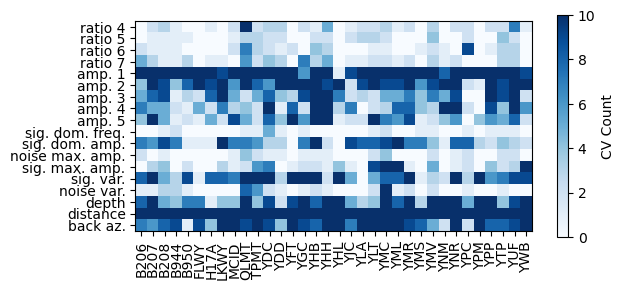

In [51]:
fig, ax = plt.subplots()
mappable = ax.imshow(mega_df.to_numpy(), cmap=cm.Blues)
ax.set_yticks(np.arange(mega_df.shape[0]), sr_feature_plot_names);
ax.set_xticks(np.arange(mega_df.shape[1]), mega_df.columns, rotation=90);
fig.colorbar(mappable, shrink=0.6, label='CV Count')

Amp 1-5, signal dominant amplitude, signal max amplitude, Signal Variance, Distance, Back Azimuth, Depth, (noise var)?  

Just use Amps 1 & 2

In [60]:
results_dict['YNR']

{'n_feats': [10, 10, 11, 8, 14, 11, 9, 9, 9, 8],
 'optfts_bool': [[False,
   False,
   False,
   False,
   True,
   True,
   True,
   True,
   True,
   False,
   True,
   False,
   False,
   True,
   False,
   True,
   True,
   True],
  [False,
   False,
   False,
   False,
   True,
   True,
   True,
   True,
   True,
   False,
   True,
   False,
   False,
   True,
   False,
   True,
   True,
   True],
  [True,
   False,
   False,
   False,
   True,
   True,
   True,
   True,
   True,
   False,
   True,
   False,
   False,
   True,
   False,
   True,
   True,
   True],
  [False,
   False,
   False,
   False,
   True,
   True,
   False,
   True,
   False,
   False,
   True,
   False,
   False,
   True,
   False,
   True,
   True,
   True],
  [True,
   False,
   False,
   True,
   True,
   True,
   True,
   True,
   True,
   False,
   True,
   True,
   True,
   True,
   False,
   True,
   True,
   True],
  [False,
   False,
   False,
   True,
   True,
   True,
   True,
   True,
   True,
